## Acceptance Criteria
As a student safety coordinator, I want a comparison of the distributions of crime in January 2023 within 1 mile of University Park campus, 1 mile of Jubilee Campus, and 1 mile of Nottingham city centre so that I can inform students of their risks in different areas.

In [2]:
import pandas as pd
import requests

# coordinates are latitude, longitude pairs
LOCATION_UNIVERSITY_PARK = (52.93726647677705, -1.1959384006396074)
LOCATION_JUBILEE_CAMPUS = (52.95232635429298, -1.1862643609249397)
LOCATION_NOTTINGHAM_CITY_CENTRE = (52.953, -1.149)

API_STREET_CRIME = "https://data.police.uk/api/crimes-street/"

def get_crimes_within_1_mile(
    lat: float, lon: float, year: int, month: int
) -> int:
    """Calculate number of crimes within 1 mile of a location for a date.

    Args:
        lat (float): Latitude of the location.
        lon (float): Longitude of the location.
        year (int): Year to find crimes.
        month (int): Month of the provided year to find crimes.

    Returns:
        int: Count of the crimes
    """
    url = (
        API_STREET_CRIME + f"all-crime?lat={lat}&lng={lon}&date={year}-{month}"
    )
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Error retrieving data: {response.status_code}")


In [4]:
data = get_crimes_within_1_mile(*LOCATION_UNIVERSITY_PARK, 2023, 1)

In [12]:
crime_types = [crime["category"] for crime in data]
crime_counts = {crime: crime_types.count(crime) for crime in set(crime_types)}
crime_counts

{'drugs': 3,
 'criminal-damage-arson': 11,
 'vehicle-crime': 10,
 'theft-from-the-person': 1,
 'other-theft': 15,
 'violent-crime': 49,
 'burglary': 11,
 'bicycle-theft': 7,
 'possession-of-weapons': 1,
 'robbery': 2,
 'public-order': 11,
 'shoplifting': 11,
 'anti-social-behaviour': 3}

In [42]:
def get_crime_stats_within_1_mile_of_all_campus_locations(
    year: int, month: int
) -> int: 
    """
    """
    
    def count_crimes(data):
        crime_types = [crime["category"] for crime in data]
        crime_counts = {crime: crime_types.count(crime) for crime in set(crime_types)}
        crime_df = pd.DataFrame(crime_counts, index=["Number of Instances"]).T
        return crime_df.sort_values(by="Number of Instances", ascending=False)
    
    upc_data = get_crimes_within_1_mile(*LOCATION_UNIVERSITY_PARK, 2023, 1)
    jc_data = get_crimes_within_1_mile(*LOCATION_JUBILEE_CAMPUS, 2023, 1)
    ncc_data = get_crimes_within_1_mile(*LOCATION_NOTTINGHAM_CITY_CENTRE, 2023, 1)
    
    all_crimes = {
        "University Park": count_crimes(upc_data),
        "Jubilee Campus": count_crimes(jc_data),
        "Nottingham City Centre": count_crimes(ncc_data)
    }
    
    return all_crimes


In [43]:
all_crimes = get_crime_stats_within_1_mile_of_all_campus_locations(2023, 1)

In [44]:
all_crimes["University Park"]

,Number of Instances
violent-crime,49
other-theft,15
criminal-damage-arson,11
burglary,11
public-order,11
shoplifting,11
vehicle-crime,10
bicycle-theft,7
drugs,3
anti-social-behaviour,3


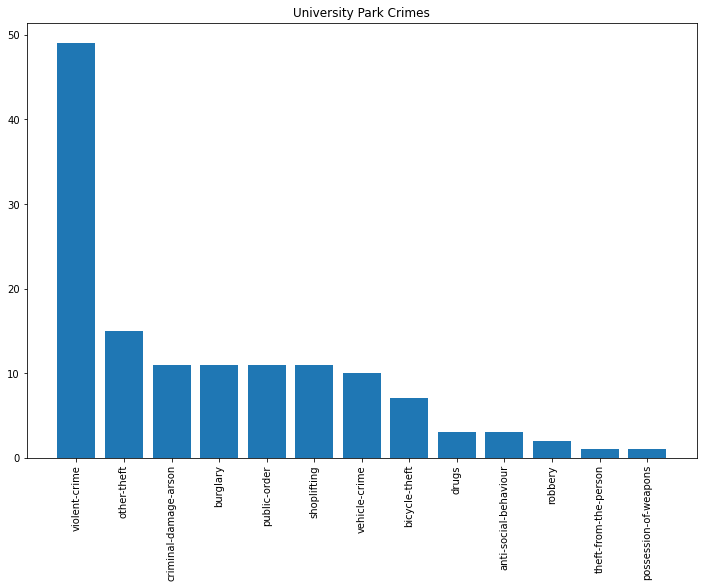

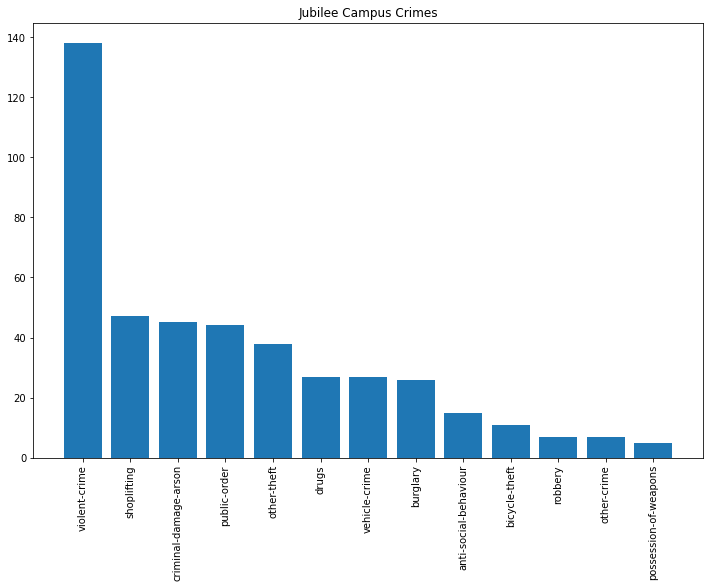

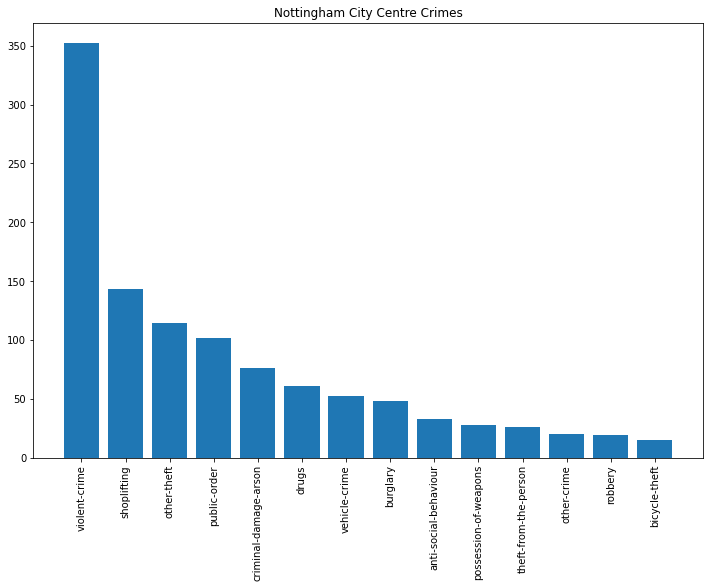

In [45]:
import matplotlib.pyplot as plt


for campus in all_crimes.keys():
    fig, ax = plt.subplots(figsize=(12, 8))

    ax.bar(
        all_crimes[campus].index,
        all_crimes[campus]["Number of Instances"]
    )

    ax.tick_params(axis='x', rotation=90)
    
    ax.set_title(f"{campus} Crimes")

    plt.show()